In [186]:
from importlib import reload

import pandas as pd
from scipy.stats import boxcox
from dfprepare import norm_data

import RRR
reload(RRR)
from RRR import *

import Task_3.LRR as LRR
reload(LRR)
from Task_3.LRR import *

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


,X1,X2,X3
0,0.100,0.214286,0.113208
1,0.375,0.464286,0.320755
2,0.625,0.750000,0.509434
3,0.850,0.964286,0.830189
4,0.650,0.642857,0.547170
5,1.000,1.000000,1.000000
6,0.225,0.285714,0.396226
7,0.525,0.535714,0.396226
8,0.775,0.678571,0.754717
9,0.000,0.000000,0.000000


<Axes: >

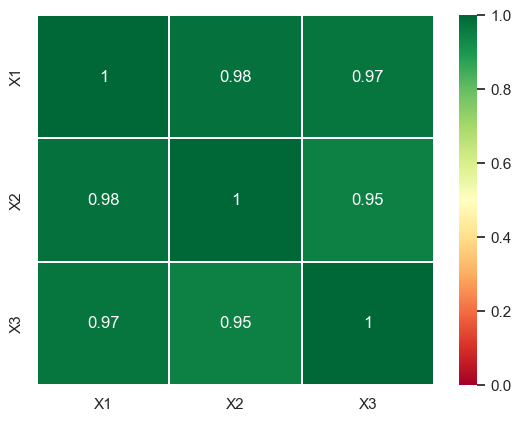

In [187]:
# Read dataframe
data = pd.read_excel('blood.xlsx')
data.dropna(inplace=True)
display(data)

# Dependent variable
explore_column = 'X1' 
 
# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

### Гребневая регрессия

,Variable,VIF,Tolerance
0,X2,36.241532,0.027593
1,X3,36.241532,0.027593


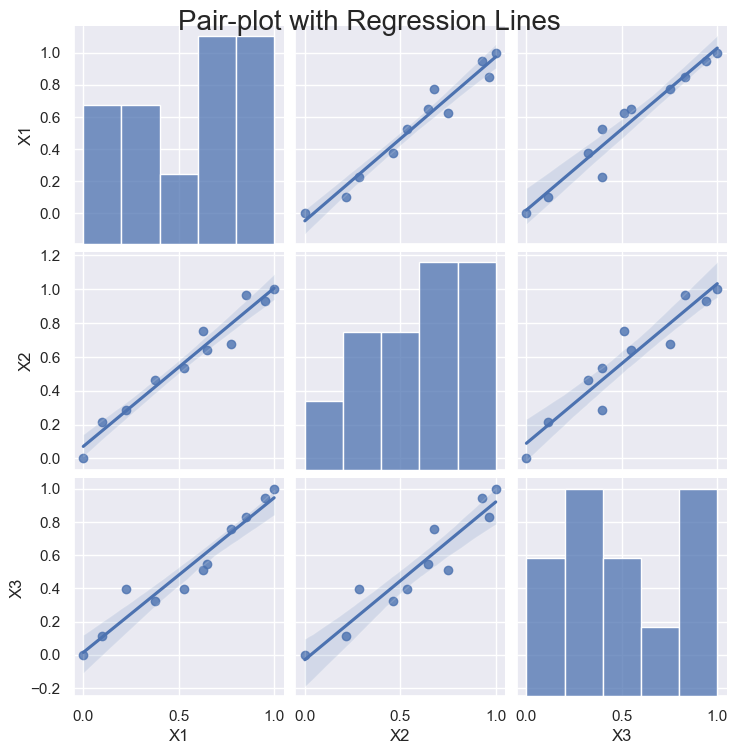

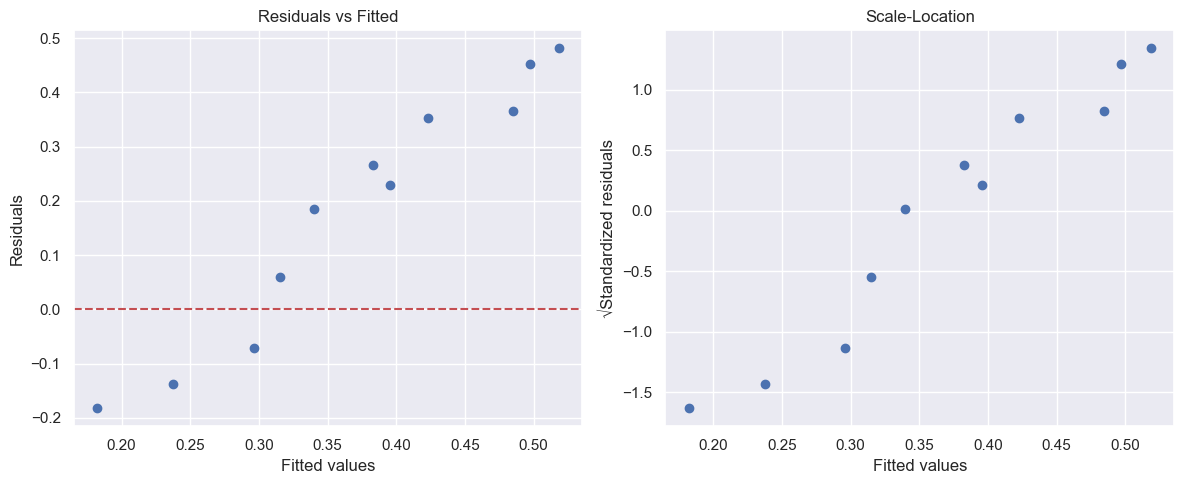

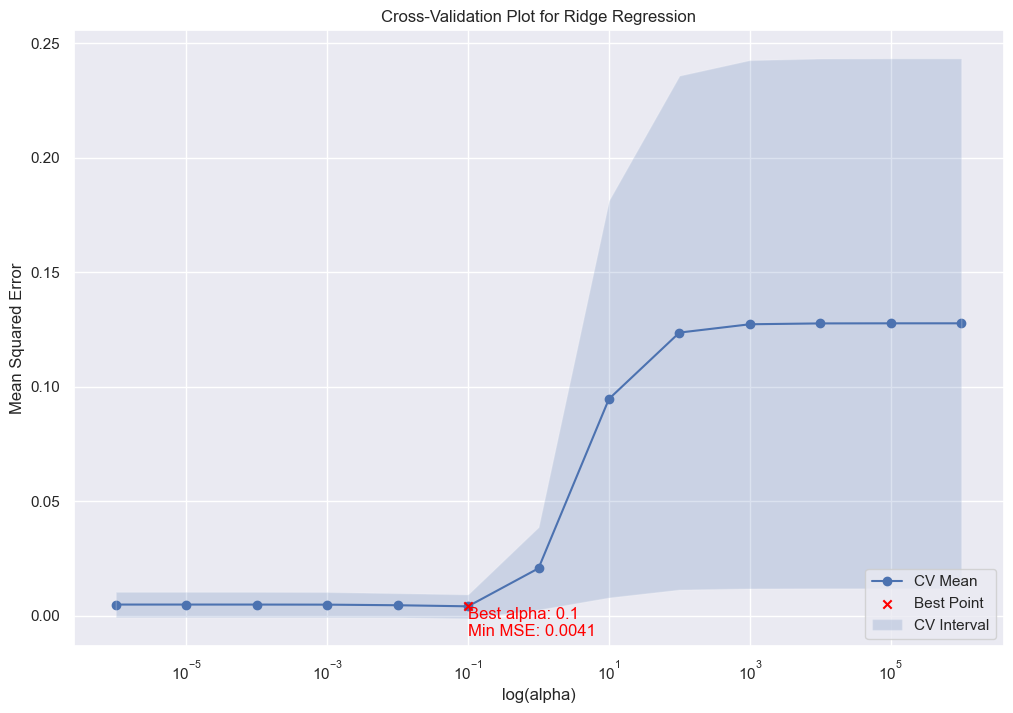

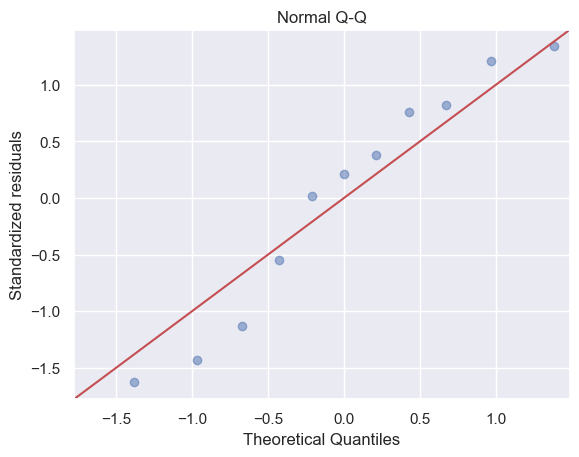

                                STEPS AIC                              
Selected Features: ['X2', 'X3'] 
AIC: 100 
Selected Features: ['X2'] 
AIC: -22.35149879425726 


In [188]:
ridge_research = RidgeRegressionResearch(data, column=explore_column)
ridge_research.info()
ridge_research.draw_plots()
ridge_new_model, selected_features_ridge = ridge_research.stepwise_selection(criteria='AIC')

'D:\\Projects\\PyCharm_Projects\\Matt\\mathstats.py: UserWarning: (VIF/Tolerance) test only valid for n>=2 ... continuing anyway, n=1'

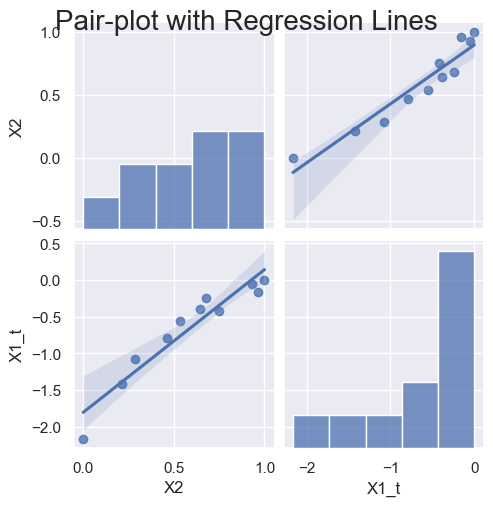

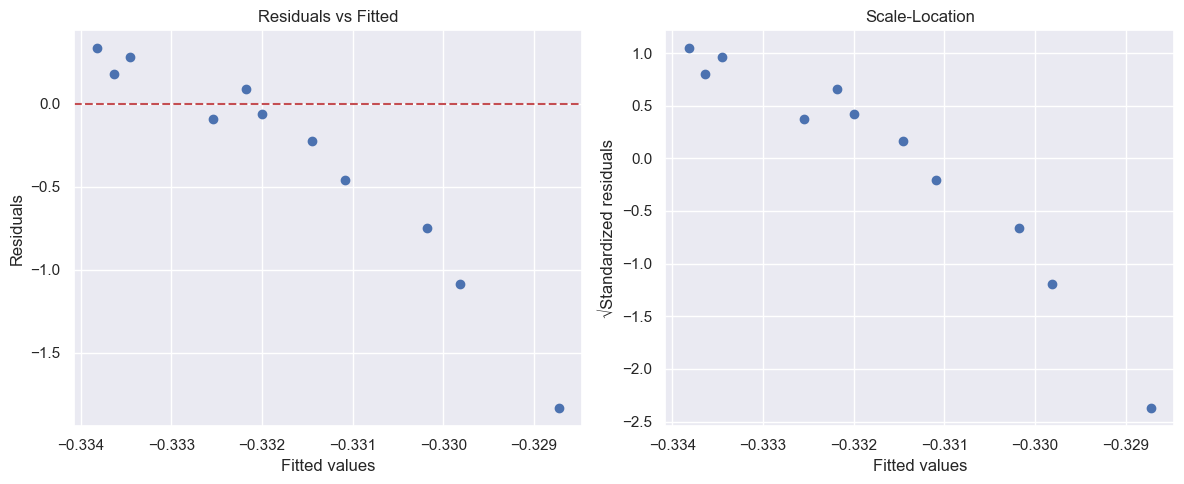

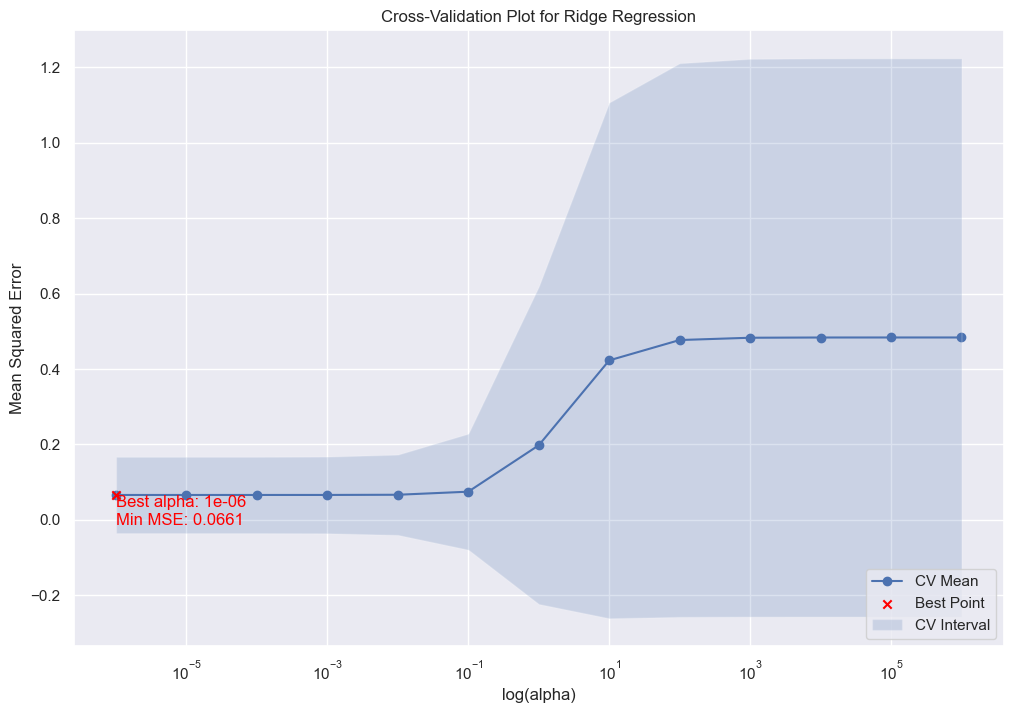

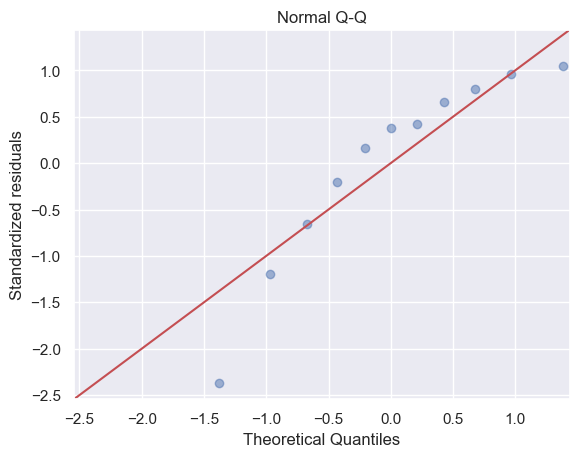

In [189]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1e-6)  # + 1e-6 чтобы не было 0-значений

new_data = data[selected_features_ridge].copy()
new_explore_column = explore_column + '_t'
new_data[new_explore_column] = y_transformed

# Проводим анализ заново
enhanced_research = RidgeRegressionResearch(new_data, column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()

### Линейная регрессия

                                      X1                                      
Dep. Variable:                     X1   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     168.8
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.87e-07
Time:                        06:37:38   Log-Likelihood:                 17.472
No. Observations:                  11   AIC:                            -28.94
Df Residuals:                       8   BIC:                            -27.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0365      0.038     -0.966      0.3

D:\PythonEnv\Matt\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,Variable,VIF,Tolerance
0,X2,36.241532,0.027593
1,X3,36.241532,0.027593


,Intercept,X2,X3,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.933117,0.36234417473640984,8.0,1.0
1,0.0,1.0,0.0,12.042345,0.008440159086301219,8.0,1.0
2,0.0,0.0,1.0,6.567259,0.033507670692348786,8.0,1.0
3,"[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]",445.470148,3.0781996316779783e-09,8.0,3.0


,dfb_Intercept,dfb_X2,dfb_X3,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.422737,-0.052463,0.176840,0.084269,-0.858890,0.255233,-0.502801,-0.843237,-0.493637
1,-0.044153,-0.046045,0.057394,0.003050,-0.205405,0.178214,-0.095654,-0.192648,-0.089713
2,0.030537,-0.239187,0.228904,0.028126,-0.368773,0.382894,-0.290481,-0.347925,-0.274060
3,0.311203,-0.421738,0.254303,0.179757,-1.263604,0.252472,-0.734351,-1.321168,-0.767804
4,0.085455,0.121479,-0.108516,0.040338,1.022046,0.103823,0.347872,1.025316,0.348985
5,0.042693,0.023122,-0.057192,0.006666,-0.211590,0.308762,-0.141414,-0.198480,-0.132652
6,-1.429947,1.656401,-1.438072,0.781478,-1.913693,0.390306,-1.531155,-2.431014,-1.945066
7,0.197380,0.286067,-0.325110,0.084242,1.175714,0.154570,0.502720,1.209198,0.517037
8,0.203845,-0.628953,0.716608,0.234543,1.365835,0.273878,0.838826,1.459009,0.896048
9,0.697729,-0.287827,0.094895,0.169489,0.829946,0.424687,0.713070,0.812091,0.697729


,student_resid,unadj_p,bonferroni(p)
0,-0.843237,0.426967,1.000000
1,-0.192648,0.852705,1.000000
2,-0.347925,0.738124,1.000000
3,-1.321168,0.227992,1.000000
4,1.025316,0.339335,1.000000
5,-0.198480,0.848311,1.000000
6,-2.431014,0.045353,0.498883
7,1.209198,0.265838,1.000000
8,1.459009,0.187929,1.000000
9,0.812091,0.443475,1.000000


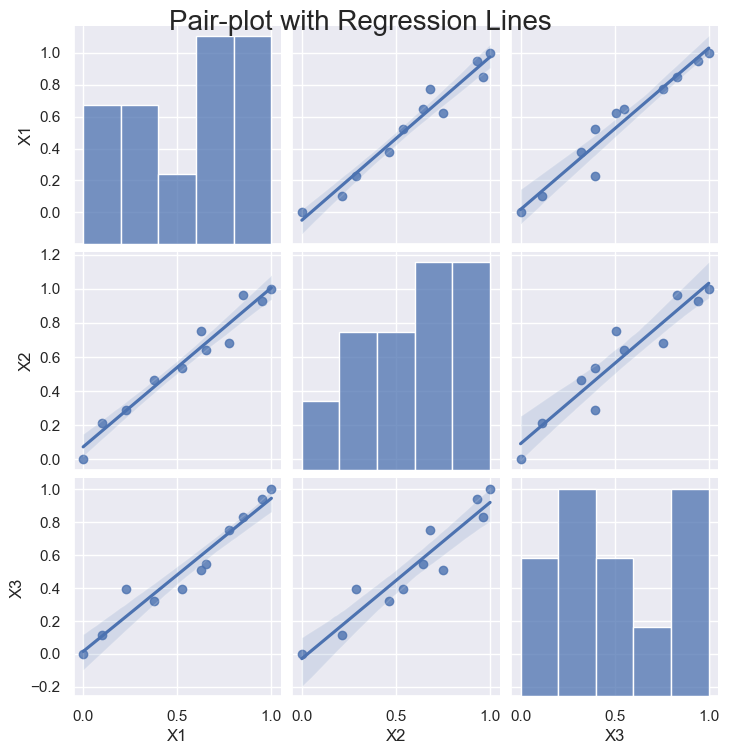

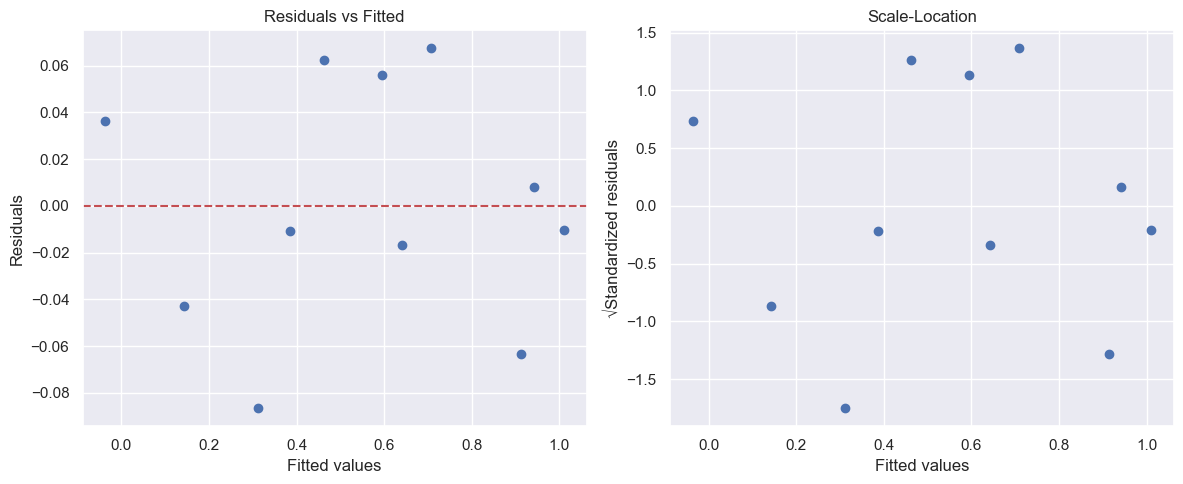

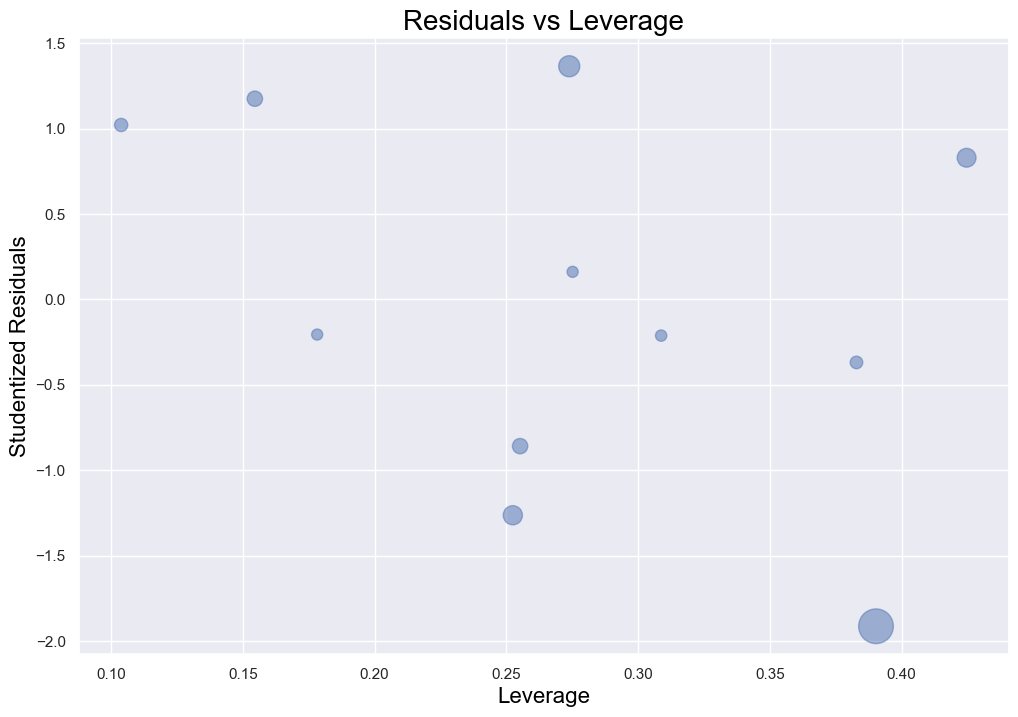

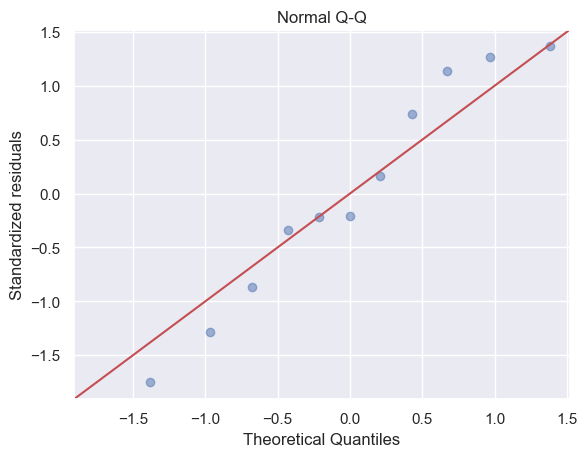

                                STEPS AIC                              
Selected Features: ['X2', 'X3'] 
AIC: -28.94418317331258 


In [190]:
linear_research = LinearRegressionResearch(data, column=explore_column)
linear_research.info()
linear_research.draw_plots()
linear_new_model, selected_features_linear = linear_research.stepwise_selection(criteria='AIC')

                                     X1_t                                     
Dep. Variable:                   X1_t   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     43.33
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           5.10e-05
Time:                        06:37:41   Log-Likelihood:                 3.0244
No. Observations:                  11   AIC:                          -0.04882
Df Residuals:                       8   BIC:                             1.145
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7971      0.140    -12.795      0.0

D:\PythonEnv\Matt\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,Variable,VIF,Tolerance
0,X2,36.241532,0.027593
1,X3,36.241532,0.027593


,Intercept,X2,X3,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,163.710278,1.3130799566268663e-06,8.0,1.0
1,0.0,1.0,0.0,6.928375,0.0300761875083597,8.0,1.0
2,0.0,0.0,1.0,0.162498,0.6974254557965784,8.0,1.0
3,"[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]",63.316716,6.457999633286675e-06,8.0,3.0


,dfb_Intercept,dfb_X2,dfb_X3,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.036594,-0.004541,0.015308,0.000695,-0.078005,0.255233,-0.045665,-0.072995,-0.042732
1,0.153228,0.159792,-0.199178,0.034710,0.692939,0.178214,0.322691,0.668560,0.311338
2,0.016180,-0.126734,0.121285,0.007994,-0.196600,0.382894,-0.154861,-0.184349,-0.145211
3,0.278582,-0.377530,0.227647,0.149994,-1.154265,0.252472,-0.670807,-1.182680,-0.687321
4,0.068419,0.097262,-0.086883,0.027130,0.838178,0.103823,0.285289,0.820917,0.279414
5,0.193748,0.104931,-0.259550,0.123720,-0.911556,0.308762,-0.609230,-0.900743,-0.602004
6,0.442643,-0.512742,0.445158,0.127768,0.773793,0.390306,0.619115,0.752525,0.602099
7,0.190022,0.275403,-0.312991,0.079079,1.139111,0.154570,0.487069,1.164123,0.497764
8,0.160216,-0.494338,0.563232,0.159067,1.124805,0.273878,0.690798,1.146736,0.704267
9,-2.920171,1.204626,-0.397161,1.225737,-2.231913,0.424687,-1.917606,-3.398805,-2.920171


,student_resid,unadj_p,bonferroni(p)
0,-0.072995,0.943852,1.000000
1,0.668560,0.525202,1.000000
2,-0.184349,0.858967,1.000000
3,-1.182680,0.275545,1.000000
4,0.820917,0.438752,1.000000
5,-0.900743,0.397654,1.000000
6,0.752525,0.476274,1.000000
7,1.164123,0.282512,1.000000
8,1.146736,0.289172,1.000000
9,-3.398805,0.011461,0.126072


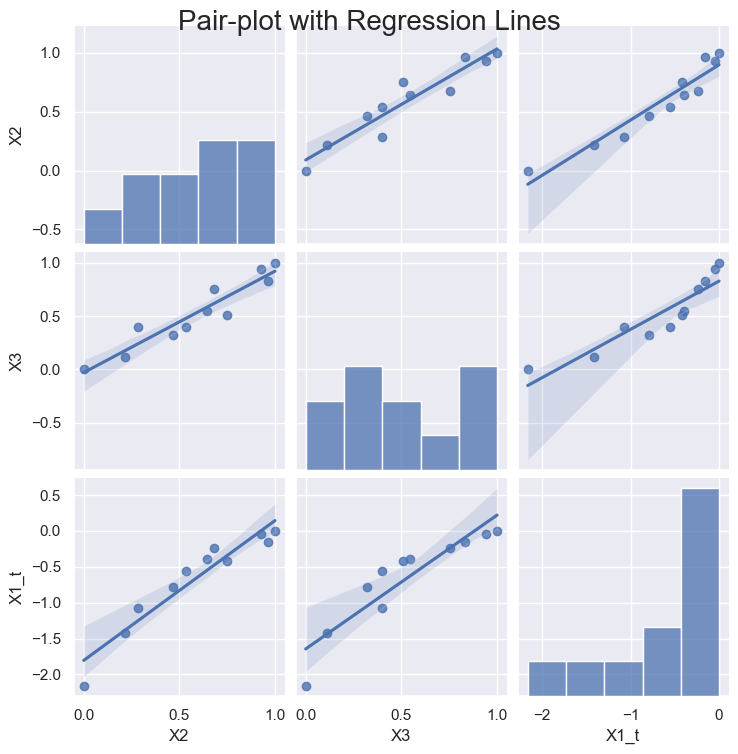

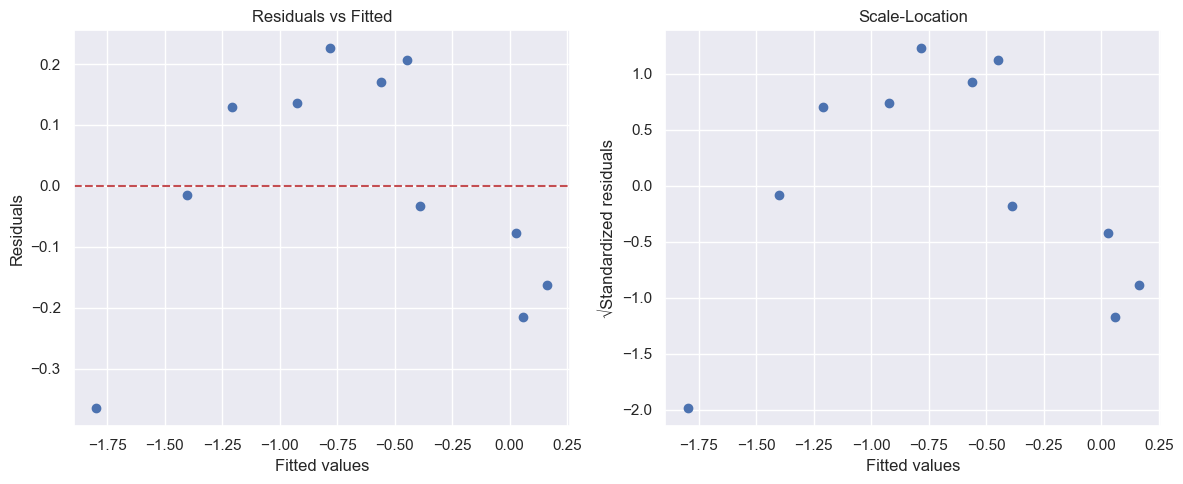

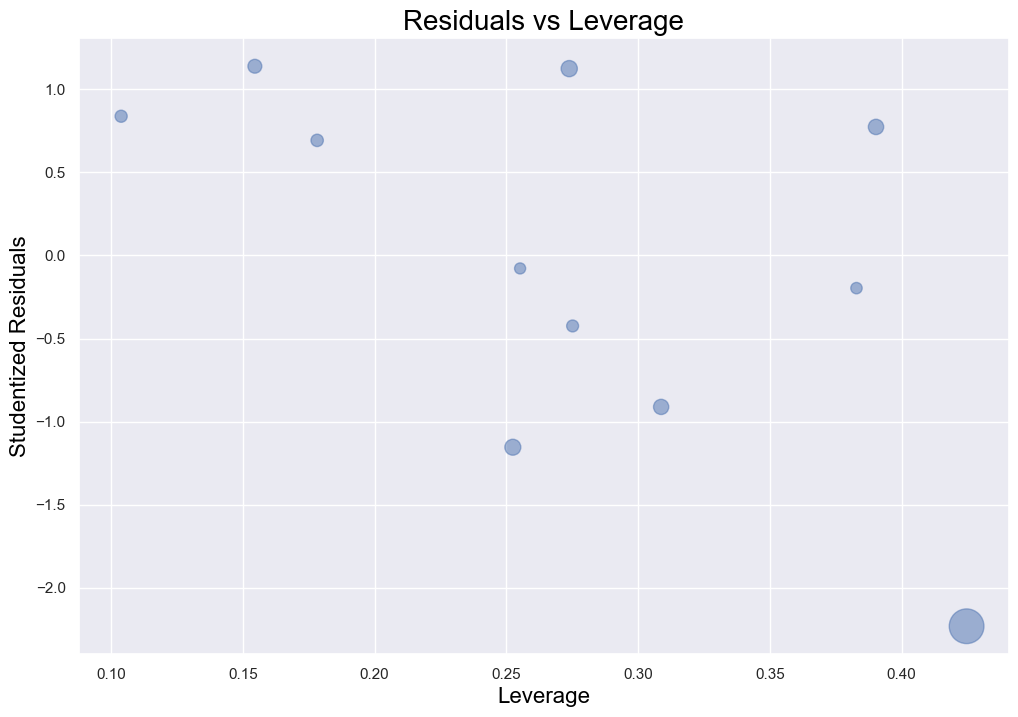

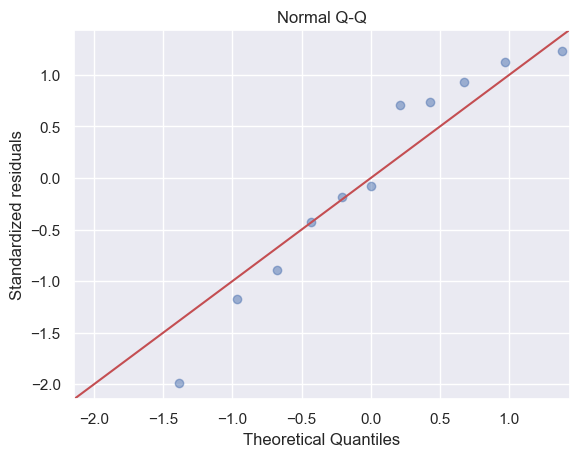

In [191]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1e-6)  # + 1e-6 чтобы не было 0-значений

new_data = data[selected_features_linear].copy()
new_explore_column = explore_column + '_t'
new_data[new_explore_column] = y_transformed

# Проводим анализ заново
enhanced_research = LinearRegressionResearch(new_data, column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()